In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pima = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/day%202/diabetes.csv')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Y = pima.Outcome
X = pima.drop(['Outcome'], axis=1)

In [6]:
X.shape, Y.shape

((768, 8), (768,))

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                   random_state=True)

In [8]:
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [9]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression().fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [13]:
y_pred = cls.predict(x_train)
y_pred[:10], y_train[:10]

(array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0]), 663    1
 712    1
 161    0
 509    0
 305    0
 426    0
 13     1
 480    1
 682    0
 607    0
 Name: Outcome, dtype: int64)

In [14]:
from sklearn import metrics

In [15]:
metrics.confusion_matrix(y_train, y_pred)

array([[358,  43],
       [ 90, 123]])

In [17]:
y_pred = cls.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

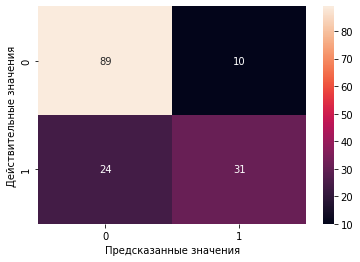

In [18]:
import seaborn as sns
%matplotlib inline

class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [19]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

In [20]:
metrics.precision_score(y_test, y_pred)

0.7560975609756098

In [21]:
metrics.recall_score(y_test, y_pred)

0.5636363636363636

In [22]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [26]:
from sklearn import svm
clf = svm.SVC(kernel='rbf').fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



In [27]:
metrics.accuracy_score(y_test, y_pred)

0.7857142857142857

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        99
           1       0.73      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [35]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        99
           1       0.60      0.60      0.60        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



In [37]:
y_pred[:20], y_test[:20]

(array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1]), 285    0
 101    0
 581    0
 352    0
 726    0
 472    0
 233    0
 385    0
 556    0
 59     0
 756    0
 341    0
 445    1
 614    1
 371    0
 355    1
 19     1
 711    0
 430    0
 117    0
 Name: Outcome, dtype: int64)

In [38]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

In [39]:
print(news.data[0])
print(news.target[0], news.target_names[news.target[0]])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


10 rec.sport.hockey


In [40]:
SPLIT_PERC = 0.75
split_size = int(len(news.data)*SPLIT_PERC)
X_train = news.data[:split_size]
X_test = news.data[split_size:]
y_train = news.target[:split_size]
y_test = news.target[split_size:]

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer

In [42]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_train)
X.shape

(14134, 140678)

In [43]:
clf = MultinomialNB().fit(X, y_train)

print("Accuracy on training set:")
print(clf.score(X, y_train))

X_test_vec = vectorizer.transform(X_test)
print("Accuracy on testing set:")
print(clf.score(X_test_vec, y_test))

y_pred = clf.predict(X_test_vec)

print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy on training set:
0.9267015706806283
Accuracy on testing set:
0.8425297113752123
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       216
           1       0.61      0.85      0.71       246
           2       0.94      0.12      0.21       274
           3       0.61      0.85      0.71       235
           4       0.89      0.87      0.88       231
           5       0.75      0.90      0.82       225
           6       0.88      0.68      0.77       248
           7       0.90      0.88      0.89       275
           8       0.94      0.94      0.94       226
           9       0.97      0.94      0.96       250
          10       0.97      0.98      0.98       257
          11       0.87      0.98      0.92       261
          12       0.85      0.86      0.85       216
          13       0.90      0.92      0.91       257
          14       0.91      0.93      0.92       246
          15       0.81